In [350]:
import random
import time
import networkx as nx

EXHIBITORY = 20  # divides incoming voltage by value: incoming voltage 100 --> results in 5mv change in result
INHIBITORY = -20
ELECTRICAL = 1

STEP_TIME = 1  # waiting time between steps in seconds

In [408]:
class Neuron:
    def __init__(self, name, action_potential=None, trigger=None, network=None):
        self.name = name
        self.charge = -70.0  # initialize to resting potential
        self.children = []
        self.action_potential = random.randint(100, 130) if action_potential is None else action_potential
        self.trigger_voltage = random.randint(-65, -55) if trigger is None else trigger
        self.network = network

    def __str__(self):
        children = ""
        for neuron, connection in self.children:
            children += f"connection:{connection}\n{neuron},\n"
        return (f"ID:{self.name}\n"
                f"   AP:{self.action_potential}\n"
                f"   TV:{self.trigger_voltage}\n"
                f"   CH:{self.charge}\n"
                f"   Children:[\n{children}]")

    def connect_child(self, neuron, connection):
        self.children.append((neuron, connection))
        if network is not None:
            network.append((self.name, neuron.name))

    def influence_charge(self, difference):
        self.charge += difference
        self.update()

    def neutralize(self):
        self.charge -= (self.charge + 70.0) * 0.15

    def trigger(self):
        print(f"triggered: {self.name}: AP: {self.action_potential}")
        self.charge = self.action_potential
        for neuron, connection in self.children:
            neuron.influence_charge(self.charge / connection)

    def update(self):
        print(f"updated: {self.name}: CH: {self.charge}")  # DEBUG
        if self.charge >= self.trigger_voltage:
            self.trigger()

        self.neutralize()

    def set_charge(self, charge):
        self.charge = charge

In [388]:
# Neuron set
network = []

# create first neuron
starting_neuron = Neuron(0, network=network)

# create second neuron
second_neuron = Neuron(1, network=network)
starting_neuron.connect_child(second_neuron, INHIBITORY)

# create third neuron
third_neuron = Neuron(2, network=network)
starting_neuron.connect_child(third_neuron, ELECTRICAL)

# create fourth neuron
fourth_neuron = Neuron(3, network=network)
second_neuron.connect_child(fourth_neuron, EXHIBITORY)
third_neuron.connect_child(fourth_neuron, EXHIBITORY)

print(starting_neuron)

ID:0
   AP:126
   TV:-64
   CH:-70.0
   Children:[
connection:-20
ID:1
   AP:116
   TV:-57
   CH:-70.0
   Children:[
connection:20
ID:3
   AP:124
   TV:-64
   CH:-70.0
   Children:[
],
],
connection:1
ID:2
   AP:122
   TV:-55
   CH:-70.0
   Children:[
connection:20
ID:3
   AP:124
   TV:-64
   CH:-70.0
   Children:[
],
],
]


In [389]:
print(network)

[(0, 1), (0, 2), (1, 3), (2, 3)]


In [390]:
graph = nx.DiGraph(network)

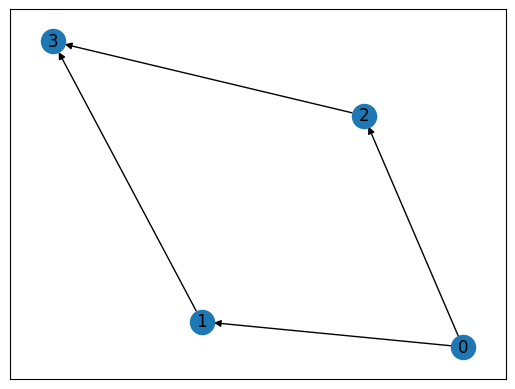

In [391]:
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos=pos, with_labels=True)

In [392]:
#--------------------------Create neurons from random graph----------------------------------
random_graph = nx.DiGraph(nx.gnc_graph(5, seed=3))
random_graph = random_graph.reverse()

In [393]:
random_graph = nx.DiGraph(nx.random_k_out_graph(10, 2, 3, 
                                                self_loops=False,  # set to true for interesting "aneurysms"
                                                seed=1))

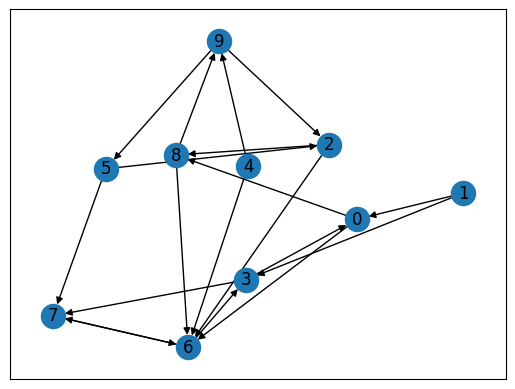

In [394]:
# display graph
pos = nx.spring_layout(random_graph)
nx.draw_networkx(random_graph, pos=pos, with_labels=True)

In [395]:
# create random data (connections)
colors = {EXHIBITORY: 'green', INHIBITORY: 'red', ELECTRICAL: 'blue'}
widths = {EXHIBITORY: 3, INHIBITORY: 1, ELECTRICAL: 2}
data = {}

for edge in random_graph.edges:
    connection = random.choice([ELECTRICAL, INHIBITORY, EXHIBITORY])
    data[edge] = {"connection": connection, "color": colors[connection], "width": widths[connection]}
    
print(data)
nx.set_edge_attributes(random_graph, data)  # apply data to edges

{(0, 8): {'connection': -20, 'color': 'red', 'width': 1}, (0, 6): {'connection': 1, 'color': 'blue', 'width': 2}, (1, 3): {'connection': 20, 'color': 'green', 'width': 3}, (1, 0): {'connection': 1, 'color': 'blue', 'width': 2}, (2, 6): {'connection': 20, 'color': 'green', 'width': 3}, (2, 8): {'connection': -20, 'color': 'red', 'width': 1}, (3, 0): {'connection': 20, 'color': 'green', 'width': 3}, (3, 7): {'connection': 20, 'color': 'green', 'width': 3}, (4, 6): {'connection': 1, 'color': 'blue', 'width': 2}, (4, 9): {'connection': 20, 'color': 'green', 'width': 3}, (5, 7): {'connection': 20, 'color': 'green', 'width': 3}, (5, 2): {'connection': 20, 'color': 'green', 'width': 3}, (6, 3): {'connection': 20, 'color': 'green', 'width': 3}, (6, 7): {'connection': -20, 'color': 'red', 'width': 1}, (7, 6): {'connection': 1, 'color': 'blue', 'width': 2}, (8, 6): {'connection': 20, 'color': 'green', 'width': 3}, (8, 9): {'connection': 1, 'color': 'blue', 'width': 2}, (9, 5): {'connection': -20

In [396]:
# create a neuron for every node
neurons = {}
for node in random_graph.nodes:
    neurons[node] = Neuron(node)
    
print(neurons)

{0: <__main__.Neuron object at 0x00000272022DF800>, 1: <__main__.Neuron object at 0x00000272022DEC30>, 2: <__main__.Neuron object at 0x00000272022DC680>, 3: <__main__.Neuron object at 0x00000272022DDEE0>, 4: <__main__.Neuron object at 0x00000272022DC4D0>, 5: <__main__.Neuron object at 0x00000272022DECF0>, 6: <__main__.Neuron object at 0x00000272022DD910>, 7: <__main__.Neuron object at 0x00000272022DFD70>, 8: <__main__.Neuron object at 0x00000272022DE090>, 9: <__main__.Neuron object at 0x00000272022DCF80>}


In [397]:
# connect nodes according to random edge data
for edge in random_graph.edges:
    neurons[edge[0]].connect_child(neurons[edge[1]], random_graph.edges[edge]["connection"])

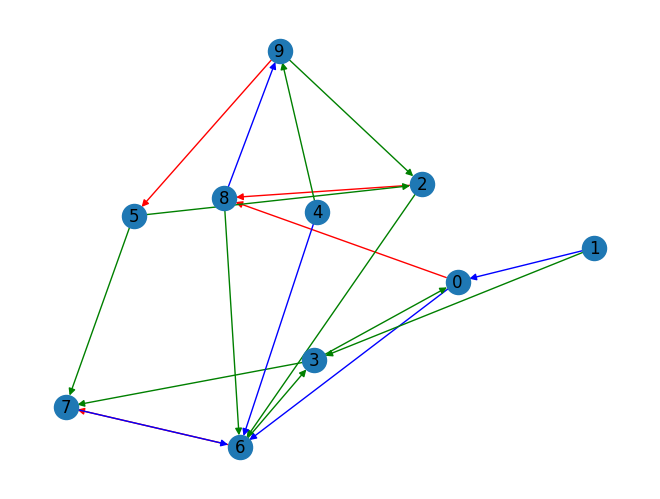

In [398]:
# formatted printing
edges = random_graph.edges()
edge_colors = [edges[edge]["color"] for edge in random_graph.edges]
edge_widths = [edges[edge]["width"] for edge in random_graph.edges]
nx.draw(random_graph, 
        pos, 
        edge_color=edge_colors, 
        #width=edge_widths, 
        with_labels=True)

In [399]:
#------------------------------------------Testing functions------------------------------------------------------

In [400]:
print(neurons[0].charge)

-70.0


In [401]:
neurons[0].influence_charge(5)

updated: 0: CH: -65.0


In [404]:
def run_secs(seconds):
    for i in range(seconds):
        time.sleep(1)
        for neuron in neurons.values():
            neuron.update()
            
        print("\n")
        

In [405]:
run_secs(10)

updated: 0: CH: -69.16328378155194
updated: 1: CH: -70.0
updated: 2: CH: -70.0
updated: 3: CH: -70.0
updated: 4: CH: -70.0
updated: 5: CH: -70.0
updated: 6: CH: -70.0
updated: 7: CH: -70.0
updated: 8: CH: -70.0
updated: 9: CH: -70.0


updated: 0: CH: -69.28879121431915
updated: 1: CH: -70.0
updated: 2: CH: -70.0
updated: 3: CH: -70.0
updated: 4: CH: -70.0
updated: 5: CH: -70.0
updated: 6: CH: -70.0
updated: 7: CH: -70.0
updated: 8: CH: -70.0
updated: 9: CH: -70.0


updated: 0: CH: -69.39547253217127
updated: 1: CH: -70.0
updated: 2: CH: -70.0
updated: 3: CH: -70.0
updated: 4: CH: -70.0
updated: 5: CH: -70.0
updated: 6: CH: -70.0
updated: 7: CH: -70.0
updated: 8: CH: -70.0
updated: 9: CH: -70.0


updated: 0: CH: -69.48615165234558
updated: 1: CH: -70.0
updated: 2: CH: -70.0
updated: 3: CH: -70.0
updated: 4: CH: -70.0
updated: 5: CH: -70.0
updated: 6: CH: -70.0
updated: 7: CH: -70.0
updated: 8: CH: -70.0
updated: 9: CH: -70.0


updated: 0: CH: -69.56322890449374
updated: 1: CH: -70.0
upd

In [406]:
def trigger_first():
    neurons[0].trigger()

In [407]:
trigger_first()
run_secs(10)

triggered: 0
updated: 8: CH: -75.65
updated: 6: CH: 43.0
triggered: 6
updated: 3: CH: -64.15
updated: 7: CH: -75.85
updated: 0: CH: 113
triggered: 0
updated: 8: CH: -80.45250000000001
updated: 6: CH: 201.95
triggered: 6
updated: 3: CH: -59.1775
triggered: 3
updated: 0: CH: 119.4
triggered: 0
updated: 8: CH: -84.53462500000002
updated: 6: CH: 230.0
triggered: 6
updated: 3: CH: 133.85
triggered: 3
updated: 0: CH: 119.4
triggered: 0
updated: 8: CH: -88.00443125000002
updated: 6: CH: 230.0
triggered: 6
updated: 3: CH: 133.85
triggered: 3
updated: 0: CH: 119.4
triggered: 0
updated: 8: CH: -90.95376656250002
updated: 6: CH: 230.0
triggered: 6
updated: 3: CH: 133.85
triggered: 3
updated: 0: CH: 119.4
triggered: 0
updated: 8: CH: -93.46070157812503
updated: 6: CH: 230.0
triggered: 6
updated: 3: CH: 133.85
triggered: 3
updated: 0: CH: 119.4
triggered: 0
updated: 8: CH: -95.59159634140627
updated: 6: CH: 230.0
triggered: 6
updated: 3: CH: 133.85
triggered: 3
updated: 0: CH: 119.4
triggered: 0
up

RecursionError: maximum recursion depth exceeded